In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsapi

# import torch
# import torch.nn as nn
# import torch.nn.functional as F
# from torch.utils import data

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
import datetime

yesterday = (datetime.datetime.today() - datetime.timedelta(days = 1)).strftime("%m_%d_%Y")
today = datetime.datetime.today().strftime("%m_%d_%Y")

In [3]:
hits = pd.concat([pd.read_csv("data/player_stats/player_stats_08_06_2019.csv"),
                  pd.read_csv("data/player_stats/player_stats_08_05_2019.csv"),
                  pd.read_csv("data/player_stats/player_stats_08_06_2019.csv"),
                  pd.read_csv("data/player_stats/player_stats_08_07_2019.csv"),
                  pd.read_csv("data/player_stats/player_stats_08_08_2019.csv"),
                  pd.read_csv("data/player_stats/player_stats_08_09_2019.csv")
                 ], sort=False)

In [4]:
hits.set_index(np.arange(len(hits)), inplace=True)

In [5]:
hits['player_got_hit'] = hits['player_got_hit'].apply(float)

In [6]:
hits

,Name,ID,Team,gamesPlayed,groundOuts,runs,doubles,triples,homeRuns,strikeOuts,...,whip_p5G,winPercentage_p5G,atBats_h2h,avg_h2h,hits_h2h,obp_h2h,ops_h2h,slg_h2h,pitcher_hitter_opposite_hand,player_got_hit
0,Brandon Dixon,641525,116,81.0,46.0,32.0,12.0,3.0,14.0,87.0,...,1.54,0.20,5.0,0.200,1.0,0.333,0.933,0.600,0.0,1.0
1,Dawel Lugo,608475,116,31.0,31.0,6.0,0.0,3.0,1.0,21.0,...,1.54,0.20,3.0,0.333,1.0,0.333,0.666,0.333,0.0,1.0
2,Gordon Beckham,493596,116,66.0,41.0,22.0,11.0,2.0,5.0,60.0,...,1.54,0.20,0.0,0.000,0.0,0.000,0.000,0.000,0.0,0.0
3,Harold Castro,605612,116,55.0,60.0,17.0,6.0,3.0,2.0,49.0,...,1.54,0.20,6.0,0.500,3.0,0.500,1.000,0.500,1.0,1.0
4,JaCoby Jones,592444,116,87.0,66.0,39.0,19.0,3.0,11.0,93.0,...,1.54,0.20,6.0,0.000,0.0,0.000,0.000,0.000,0.0,1.0
5,Jake Rogers,668670,116,7.0,5.0,5.0,0.0,0.0,2.0,8.0,...,1.54,0.20,2.0,0.500,1.0,0.500,2.500,2.000,0.0,1.0
6,John Hicks,543308,116,69.0,55.0,19.0,11.0,0.0,7.0,74.0,...,1.54,0.20,5.0,0.200,1.0,0.200,0.400,0.200,0.0,1.0
7,Jordy Mercer,474568,116,42.0,40.0,11.0,8.0,0.0,5.0,29.0,...,1.54,0.20,1.0,0.000,0.0,0.500,0.500,0.000,0.0,0.0
8,Miguel Cabrera,408234,116,100.0,93.0,29.0,16.0,0.0,7.0,79.0,...,1.54,0.20,0.0,0.000,0.0,0.000,0.000,0.000,0.0,0.0
9,Niko Goodrum,592348,116,101.0,71.0,54.0,24.0,4.0,10.0,123.0,...,1.54,0.20,3.0,0.333,1.0,0.600,1.267,0.667,1.0,1.0


In [7]:
data = hits.iloc[:, 3:-1]
data

,gamesPlayed,groundOuts,runs,doubles,triples,homeRuns,strikeOuts,baseOnBalls,intentionalWalks,hits,...,walksPer9Inn_p5G,whip_p5G,winPercentage_p5G,atBats_h2h,avg_h2h,hits_h2h,obp_h2h,ops_h2h,slg_h2h,pitcher_hitter_opposite_hand
0,81.0,46.0,32.0,12.0,3.0,14.0,87.0,15.0,0.0,70.0,...,3.54,1.54,0.20,5.0,0.200,1.0,0.333,0.933,0.600,0.0
1,31.0,31.0,6.0,0.0,3.0,1.0,21.0,2.0,0.0,20.0,...,3.54,1.54,0.20,3.0,0.333,1.0,0.333,0.666,0.333,0.0
2,66.0,41.0,22.0,11.0,2.0,5.0,60.0,12.0,0.0,38.0,...,3.54,1.54,0.20,0.0,0.000,0.0,0.000,0.000,0.000,0.0
3,55.0,60.0,17.0,6.0,3.0,2.0,49.0,6.0,0.0,55.0,...,3.54,1.54,0.20,6.0,0.500,3.0,0.500,1.000,0.500,1.0
4,87.0,66.0,39.0,19.0,3.0,11.0,93.0,27.0,2.0,70.0,...,3.54,1.54,0.20,6.0,0.000,0.0,0.000,0.000,0.000,0.0
5,7.0,5.0,5.0,0.0,0.0,2.0,8.0,4.0,0.0,5.0,...,3.54,1.54,0.20,2.0,0.500,1.0,0.500,2.500,2.000,0.0
6,69.0,55.0,19.0,11.0,0.0,7.0,74.0,12.0,0.0,48.0,...,3.54,1.54,0.20,5.0,0.200,1.0,0.200,0.400,0.200,0.0
7,42.0,40.0,11.0,8.0,0.0,5.0,29.0,8.0,1.0,36.0,...,3.54,1.54,0.20,1.0,0.000,0.0,0.500,0.500,0.000,0.0
8,100.0,93.0,29.0,16.0,0.0,7.0,79.0,32.0,2.0,104.0,...,3.54,1.54,0.20,0.0,0.000,0.0,0.000,0.000,0.000,0.0
9,101.0,71.0,54.0,24.0,4.0,10.0,123.0,43.0,1.0,96.0,...,3.54,1.54,0.20,3.0,0.333,1.0,0.600,1.267,0.667,1.0


In [8]:
labels = hits.iloc[:, -1]
labels

0       1.0
1       1.0
2       0.0
3       1.0
4       1.0
5       1.0
6       1.0
7       0.0
8       0.0
9       1.0
10      0.0
11      1.0
12      1.0
13      0.0
14      0.0
15      0.0
16      1.0
17      1.0
18      0.0
19      1.0
20      1.0
21      1.0
22      1.0
23      1.0
24      1.0
25      1.0
26      1.0
27      1.0
28      1.0
29      0.0
       ... 
2001    0.0
2002    1.0
2003    0.0
2004    0.0
2005    0.0
2006    1.0
2007    0.0
2008    0.0
2009    0.0
2010    1.0
2011    0.0
2012    1.0
2013    1.0
2014    0.0
2015    1.0
2016    1.0
2017    1.0
2018    0.0
2019    1.0
2020    0.0
2021    1.0
2022    1.0
2023    0.0
2024    1.0
2025    1.0
2026    1.0
2027    1.0
2028    0.0
2029    0.0
2030    0.0
Name: player_got_hit, Length: 2031, dtype: float64

In [9]:
# data_train, data_test, labels_train, labels_test = train_test_split(data, labels, test_size=0.2)
data_train, data_val, labels_train, labels_val = train_test_split(data, labels, test_size=0.2)

In [10]:
np.mean(labels_train == 0)

0.4975369458128079

In [11]:
np.mean(labels_train == 1)

0.5024630541871922

In [12]:
hits.columns

Index(['Name', 'ID', 'Team', 'gamesPlayed', 'groundOuts', 'runs', 'doubles',
       'triples', 'homeRuns', 'strikeOuts', 'baseOnBalls', 'intentionalWalks',
       'hits', 'hitByPitch', 'avg', 'atBats', 'obp', 'slg', 'ops',
       'caughtStealing', 'stolenBases', 'stolenBasePercentage',
       'groundIntoDoublePlay', 'numberOfPitches', 'plateAppearances',
       'totalBases', 'rbi', 'leftOnBase', 'sacBunts', 'sacFlies', 'babip',
       'groundOutsToAirouts', 'atBatsPerHomeRun', 'atBatsPerHomeRun_p7G',
       'avg_p7G', 'hits_p7G', 'obp_p7G', 'ops_p7G', 'slg_p7G',
       'atBatsPerHomeRun_p15G', 'avg_p15G', 'hits_p15G', 'obp_p15G',
       'ops_p15G', 'slg_p15G', 'avg_p5G', 'era_p5G', 'groundOutsToAirouts_p5G',
       'hitsPer9Inn_p5G', 'homeRunsPer9_p5G', 'inningsPitched_p5G',
       'pitchesPerInning_p5G', 'runsScoredPer9_p5G',
       'stolenBasePercentage_p5G', 'strikePercentage_p5G',
       'strikeoutWalkRatio_p5G', 'strikeoutsPer9Inn_p5G', 'walksPer9Inn_p5G',
       'whip_p5G', 'winP

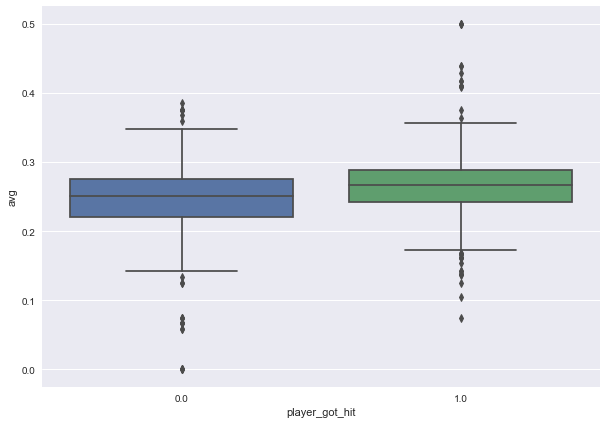

In [13]:
plt.figure(figsize=(10, 7))
sns.boxplot(x = "player_got_hit", y = "avg", data=hits)

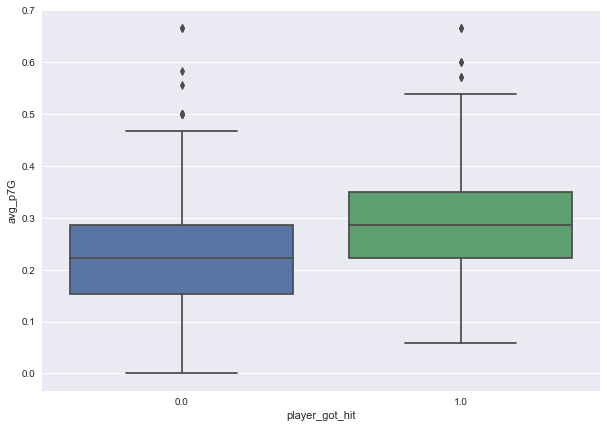

In [14]:
plt.figure(figsize=(10, 7))
sns.boxplot(x = "player_got_hit", y = "avg_p7G", data=hits)

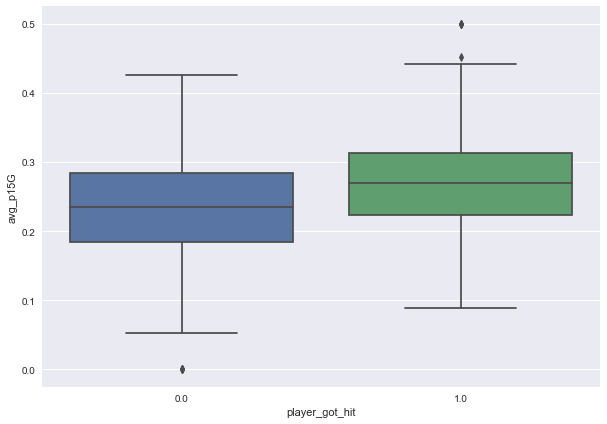

In [15]:
plt.figure(figsize=(10, 7))
sns.boxplot(x = "player_got_hit", y = "avg_p15G", data=hits)

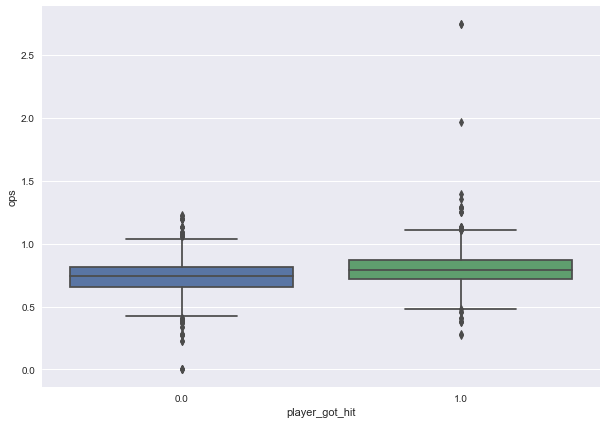

In [16]:
plt.figure(figsize=(10, 7))
sns.boxplot(x = "player_got_hit", y = "ops", data=hits)

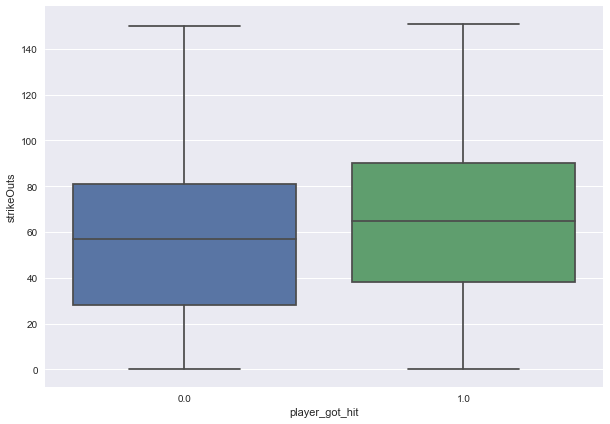

In [17]:
plt.figure(figsize=(10, 7))
sns.boxplot(x = "player_got_hit", y = "strikeOuts", data=hits)

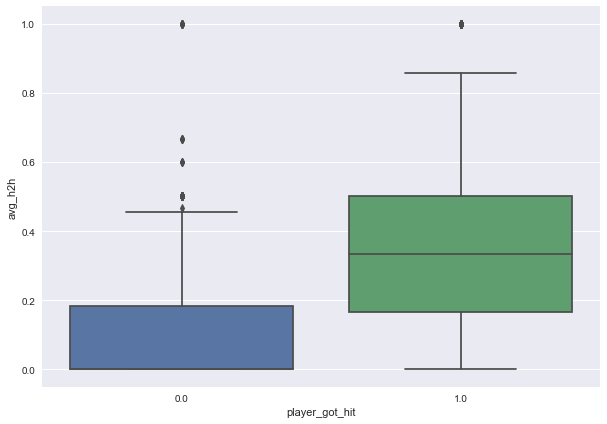

In [18]:
plt.figure(figsize=(10, 7))
sns.boxplot(x = "player_got_hit", y = "avg_h2h", data=hits)

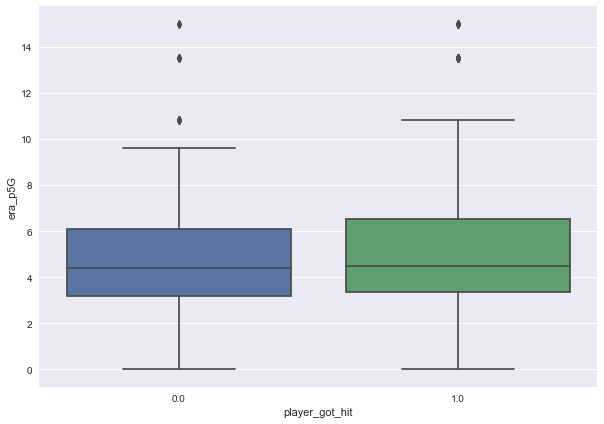

In [19]:
plt.figure(figsize=(10, 7))
sns.boxplot(x = "player_got_hit", y = "era_p5G", data=hits)

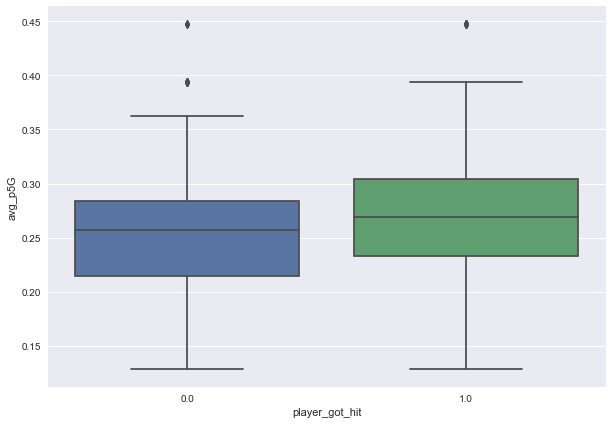

In [20]:
plt.figure(figsize=(10, 7))
sns.boxplot(x = "player_got_hit", y = "avg_p5G", data=hits)

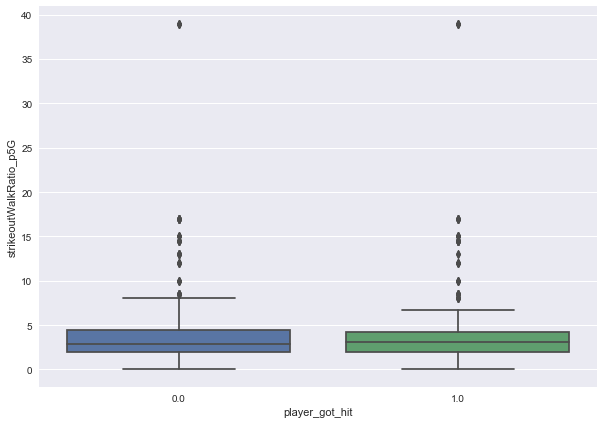

In [21]:
plt.figure(figsize=(10, 7))
sns.boxplot(x = "player_got_hit", y = "strikeoutWalkRatio_p5G", data=hits)

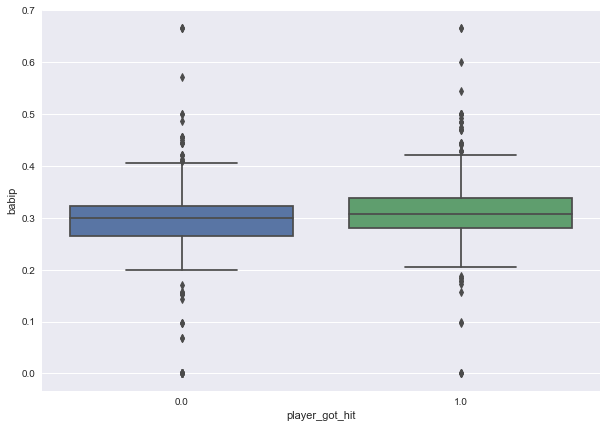

In [22]:
plt.figure(figsize=(10, 7))
sns.boxplot(x = "player_got_hit", y = "babip", data=hits)

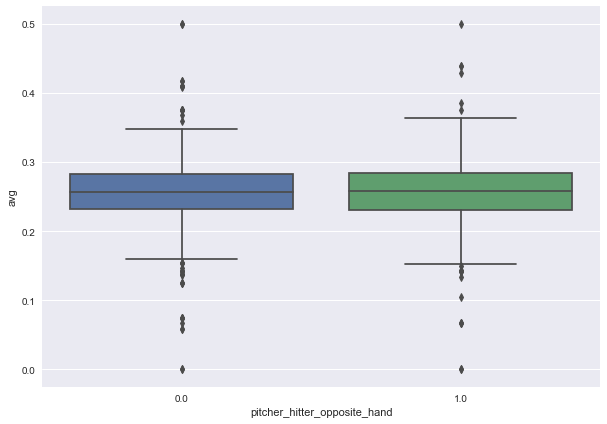

In [23]:
plt.figure(figsize=(10, 7))
sns.boxplot(x = "pitcher_hitter_opposite_hand", y = "avg", data=hits)

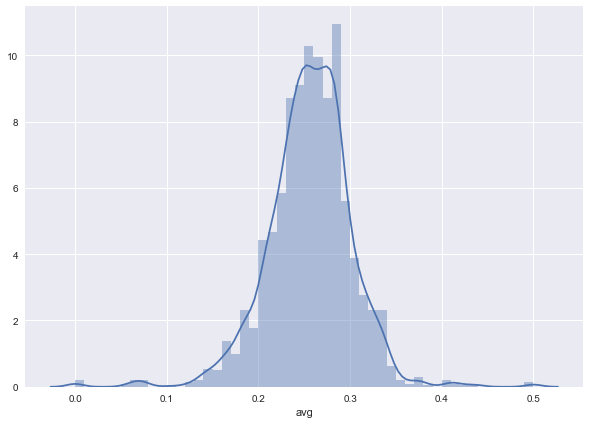

In [24]:
plt.figure(figsize=(10, 7))
sns.distplot(hits['avg'])

In [25]:
logreg = LogisticRegression(penalty='l2').fit(data_train, labels_train)

In [26]:
np.mean(logreg.predict(data_train) == labels_train)

0.7690886699507389

In [27]:
np.mean(logreg.predict(data_val) == labels_val)

0.7469287469287469

In [28]:
hits.take(data_val.take(np.argsort(logreg.predict_proba(data_val)[:, 1])[::-1][:20]).index)['Name']

1066           Trea Turner
1761          Ozzie Albies
1234          Tim Anderson
512           Jesse Winker
999        Jonathan Schoop
1041           Roman Quinn
425         Brian Anderson
818            DJ LeMahieu
89             DJ LeMahieu
1854             Juan Soto
1254       Freddie Freeman
1596       Whit Merrifield
852          Jose Iglesias
123          Jose Iglesias
982       Charlie Blackmon
951            Kris Bryant
362          Manuel Margot
1590         Hunter Dozier
1028           Ketel Marte
1984    Fernando Tatis Jr.
Name: Name, dtype: object

In [30]:
hits_test = pd.read_csv("data/player_stats/player_stats_{}.csv".format(today))
hits_test.head()

,Name,ID,Team,gamesPlayed,groundOuts,runs,doubles,triples,homeRuns,strikeOuts,...,walksPer9Inn_p5G,whip_p5G,winPercentage_p5G,atBats_h2h,avg_h2h,hits_h2h,obp_h2h,ops_h2h,slg_h2h,pitcher_hitter_opposite_hand
0,Bo Bichette,666182,141,12.0,12.0,8.0,9.0,0.0,4.0,12.0,...,4.26,1.74,0.0,1.0,1.0,1.0,1.0,3.0,2.0,0.0
1,Brandon Drury,592273,141,90.0,82.0,35.0,16.0,1.0,13.0,89.0,...,4.26,1.74,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Cavan Biggio,624415,141,61.0,37.0,39.0,7.0,0.0,10.0,73.0,...,4.26,1.74,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0
3,Danny Jansen,643376,141,88.0,73.0,30.0,12.0,1.0,10.0,66.0,...,4.26,1.74,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Derek Fisher,605233,141,25.0,21.0,12.0,2.0,1.0,3.0,21.0,...,4.26,1.74,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0


In [31]:
data_test = hits_test.iloc[:, 3:]

In [32]:
hits_test.take(np.argsort(logreg.predict_proba(data_test)[:, 1])[::-1][:15])['Name']

26        J.D. Martinez
0           Bo Bichette
5         Freddy Galvis
8         Reese McGuire
332         Ketel Marte
142        Yuli Gurriel
323          Adam Jones
331        Jarrod Dyson
213       Victor Robles
216       Eddie Rosario
139    Michael Brantley
92         Ozzie Albies
347          Tom Murphy
264       Dexter Fowler
132        Alex Bregman
Name: Name, dtype: object

In [33]:
precision_score(labels_val, logreg.predict(data_val))

0.7450980392156863

In [34]:
recall_score(labels_val, logreg.predict(data_val))

0.7487684729064039

In [35]:
f1_score(labels_val, logreg.predict(data_val))

0.746928746928747

## Gradient boosted decision trees??

In [36]:
from sklearn.ensemble import AdaBoostClassifier

In [37]:
boosted_dt = AdaBoostClassifier()
boosted_dt.fit(data_train, labels_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [38]:
np.mean(boosted_dt.predict(data_val) == labels_val)

0.7518427518427518

In [39]:
hits_test.take(np.argsort(boosted_dt.predict_proba(data_test)[:, 1])[::-1][:10])['Name']

332           Ketel Marte
34        Xander Bogaerts
8           Reese McGuire
31          Rafael Devers
92           Ozzie Albies
88        Freddie Freeman
0             Bo Bichette
139      Michael Brantley
27     Jackie Bradley Jr.
232          Jose Ramirez
Name: Name, dtype: object

In [40]:
precision_score(labels_val, boosted_dt.predict(data_val))

0.7383177570093458

In [41]:
recall_score(labels_val, boosted_dt.predict(data_val))

0.7783251231527094

In [42]:
f1_score(labels_val, boosted_dt.predict(data_val))

0.7577937649880097

## Random forests...

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
# Tuning hyperparameters for random forests
# Note that cross-validation is sort of "automatically" done because 
# sklearn's implementation of random forests uses bagging for each 
# estimator -- more details here 
# https://scikit-learn.org/stable/modules/grid_search.html#out-of-bag-estimates

from sklearn.model_selection import GridSearchCV

param_grid = [
    {'criterion': ['gini'], 'max_depth': [20], 'min_samples_leaf': [4, 10, 20, 30],
    'n_estimators': [50, 75, 100, 125, 150]}
]

In [58]:
rf_cv = GridSearchCV(RandomForestClassifier(), param_grid, cv=4)
rf_cv.fit(data_train, labels_train)

GridSearchCV(cv=4, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'criterion': ['gini'], 'max_depth': [20], 'min_samples_leaf': [4, 10, 20, 30], 'n_estimators': [50, 75, 100, 125, 150]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [59]:
rf_cv.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'min_samples_leaf': 10,
 'n_estimators': 150}

The best parameters seem to be a Gini score criterion, a max depth per tree of 20, a minimum of 10 points per leaf node, and 100 estimators.

In [45]:
rf_classifier = RandomForestClassifier(n_estimators=150, criterion='gini', max_depth=20, min_samples_leaf=10)
rf_classifier.fit(data_train, labels_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=10,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [46]:
np.mean(rf_classifier.predict(data_val) == labels_val)

0.7665847665847666

In [52]:
predictions = hits_test.take(np.argsort(rf_classifier.predict_proba(data_test)[:, 1])[::-1][:10])[['Name', 'Team']].reset_index().iloc[:, 1:]
predictions.columns = ["name", "team_id"]
predictions["team_name"] = predictions['team_id'].apply(lambda x: statsapi.lookup_team(x)[0]['name'])
predictions["hit_probability"] = np.sort(rf_classifier.predict_proba(data_test)[:, 1])[::-1][:10]
predictions.to_csv("data/predictions/predictions_{}.csv".format(today))

In [53]:
predictions

,name,team_id,team_name,hit_probability
0,Bo Bichette,141,Toronto Blue Jays,0.484076
1,J.D. Martinez,111,Boston Red Sox,0.471208
2,Reese McGuire,141,Toronto Blue Jays,0.461690
3,Freddie Freeman,144,Atlanta Braves,0.457004
4,Rafael Devers,111,Boston Red Sox,0.446068
5,Michael Brantley,117,Houston Astros,0.442264
6,Paul Goldschmidt,138,St. Louis Cardinals,0.439453
7,Nicholas Castellanos,112,Chicago Cubs,0.436575
8,Gio Urshela,147,New York Yankees,0.434946
9,Mike Yastrzemski,137,San Francisco Giants,0.434546


In [54]:
precision_score(labels_val, rf_classifier.predict(data_val))

0.7596153846153846

In [55]:
recall_score(labels_val, rf_classifier.predict(data_val))

0.7783251231527094

In [56]:
f1_score(labels_val, rf_classifier.predict(data_val))

0.7688564476885644

## K-NN, because why not

In [64]:
from sklearn.neighbors import KNeighborsClassifier

In [65]:
# TODO: tune hyperparameters
knn_clf = KNeighborsClassifier(n_neighbors=7)
knn_clf.fit(data_train, labels_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

In [66]:
np.mean(knn_clf.predict(data_val) == labels_val)

0.6363636363636364

In [67]:
hits_test.take(np.argsort(knn_clf.predict_proba(data_test)[:, 1])[::-1][:10])['Name']

135      Austin Meadows
347        Kole Calhoun
191        Josh Reddick
328    Christian Yelich
253         Tommy Edman
109      Starlin Castro
146     Travis d'Arnaud
321       Marcus Semien
34        Scott Kingery
107        Miguel Rojas
Name: Name, dtype: object

## Now the fun begins

In [ ]:
num_rows = len(data)
num_feats = len(np.transpose(data))
print(num_rows)
print(num_feats)

### Convert our arrays to torch tensors

In [ ]:
data_train_t = torch.from_numpy(np.array(data_train)).type(torch.FloatTensor)
data_val_t = torch.from_numpy(np.array(data_val)).type(torch.FloatTensor)
data_test_t = torch.from_numpy(np.array(data_test)).type(torch.FloatTensor)

labels_train_t = torch.from_numpy(np.array(labels_train)).type(torch.LongTensor)
labels_val_t = torch.from_numpy(np.array(labels_val)).type(torch.LongTensor)
# labels_test_t = torch.from_numpy(np.array(labels_test)).type(torch.LongTensor)

### Then begin training

In [ ]:
class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.classify = nn.Sequential(
            nn.Linear(num_feats, 64),
            nn.ReLU(inplace=True),
            nn.Linear(64, 32),
            nn.ReLU(inplace=True),
            nn.Linear(32, 2)
        )
        self.fc1 = nn.Linear(num_feats, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 2)
        
    def forward(self, x):
        x = self.classify(x)
        return x
    
    def predict(self, x):
        predictions = F.softmax(self.forward(x), dim=1)
        return predictions
        

In [ ]:
model = NeuralNet()

In [ ]:
# Hyperparameters
learning_rate = .001
reg_param = .001
epochs = 250

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=reg_param)

In [ ]:
losses = []
for i in range(epochs):
    outputs = model.forward(data_train_t)
    loss = criterion(outputs, labels_train_t)
    losses.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

In [ ]:
losses

In [ ]:
# Training accuracy

_, predicted = torch.max(outputs, 1)
np.mean(predicted.numpy() == labels_train)

In [ ]:
with torch.no_grad():
    val_outputs = model.forward(data_val_t)
    _, predicted_val = torch.max(val_outputs.data, 1)

In [ ]:
# Validation accuracy

np.mean(predicted_val.numpy() == labels_val)

In [ ]:
highest_probs_indices_val = np.argsort(F.softmax(val_outputs)[:, 1].numpy())[-25:][::-1]

In [ ]:
hits.take(np.array(data_val.take(highest_probs_indices_val).index))['Name']

In [ ]:
# On test data
with torch.no_grad():
    test_outputs = model.forward(data_test_t)
    _, predicted_test = torch.max(test_outputs.data, 1)

In [ ]:
highest_probs_indices_test = np.argsort(F.softmax(test_outputs)[:, 1].numpy())[-25:][::-1]

In [ ]:
hits_test.take(np.array(data_test.take(highest_probs_indices_test).index))['Name']